In [1]:
import pandas as pd
import numpy as np

In [17]:
#Load the data into the pandas environment and identify some basic details of the dataset,Reset the index as "name"

In [4]:
data=pd.read_csv("employee.csv",index_col="name")

In [5]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [8]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [10]:
data.shape

(9, 6)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


In [19]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [20]:
#3. Select rows for specific names Jack Morgan and Josh wills

In [22]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [23]:
#4. Select data for multiple values "Sales" and “Finance”.

In [27]:
data[data.department=='Sales']

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [25]:
data[data.department=='Finance']

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [28]:
#5. Display employee who has more than 700 performance score.

In [29]:
data[data.performance_score>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [30]:
#6. Display employee who has more than 500 and less than 700 performance score


In [34]:
data[(data.performance_score<700) & (data.performance_score>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [35]:
#7. Check and handle missing values in the dataset.

In [36]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [40]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [41]:
freqgraph=data.select_dtypes(include='float')
import matplotlib.pyplot as plt

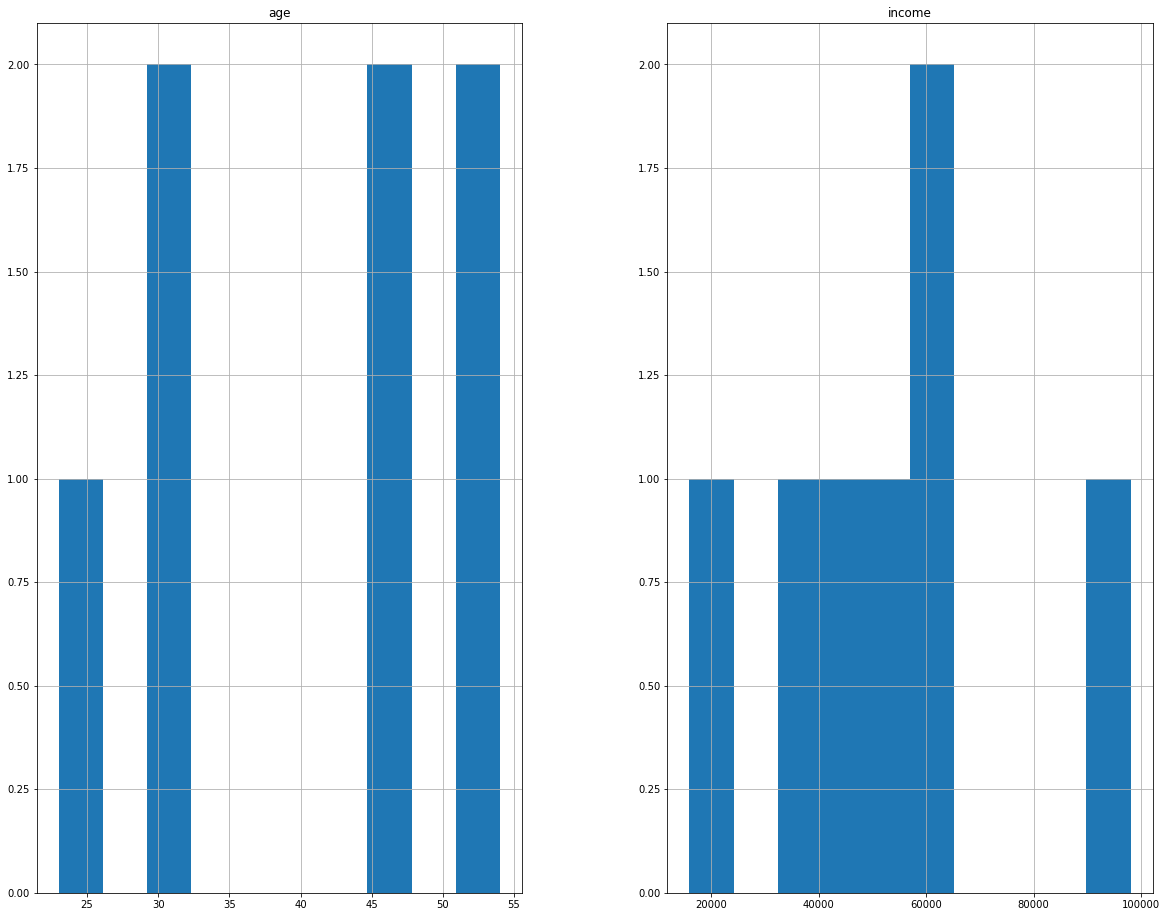

In [42]:
freqgraph.hist(figsize=(20,16))
plt.show()

In [44]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [45]:
for i in['age','income']:
    data[i]=data[i].fillna(data[i].mean())
    

In [46]:
data.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [51]:
data['gender']=data['gender'].fillna(data['gender'].ffill())

In [52]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [48]:
data.isna().sum()


age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [49]:
#8. Check the outliers and handle outliers in performance score using Percentiles.

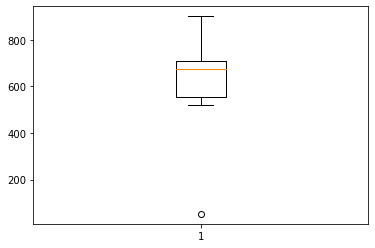

In [55]:
plt.figure()
plt.boxplot(data['performance_score'])
plt.show()

In [57]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [64]:
outlier=[]
for x in data['performance_score']:
    if((x>up)or(x<ll)):
       outlier.append(x)

In [65]:
outlier

[53]

In [66]:
ind1=data['performance_score']>up

In [67]:
data.loc[ind1].index

Index([], dtype='object', name='name')

In [68]:
ind2=data['performance_score']<ll

In [70]:
data.loc[ind2].index

Index(['James Authur'], dtype='object', name='name')

In [76]:
data.drop(['James Authur'],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dae048d2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dae048d850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dae04a8fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dae048ddf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dae049e100>],
 'means': []}

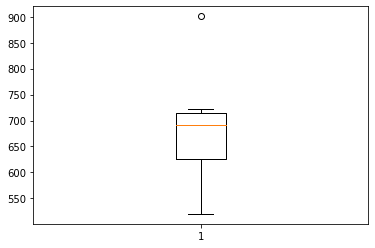

In [78]:
plt.figure()
plt.boxplot(data['performance_score'])

In [79]:
#9. Check the gender column and do Dummy encoding.

In [80]:
data.gender.nunique()

2

In [83]:
data1=pd.get_dummies(data,columns=['gender'],drop_first=True)


In [84]:
data1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,0
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,0
Josh Wills,54.000000,52000.000000,Finance,G3,901,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,1


In [85]:
#10.Do the standard scaling on the feature performance score.

In [86]:
type(data)

pandas.core.frame.DataFrame

In [89]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
data['performance_score'] =standardisation.fit_transform(data[['performance_score']])
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,0.392262
S Kumar,40.428571,16000.000000,F,Finance,G0,-1.475872
Jack Morgan,32.000000,35000.000000,M,Finance,G2,-0.058667
Ying Chin,45.000000,65000.000000,F,Sales,G3,-1.144578
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,0.281831
Satyam Sharma,40.428571,62000.000000,F,Sales,G3,-0.288733
Josh Wills,54.000000,52000.000000,F,Finance,G3,2.030331
Leo Duck,23.000000,98000.000000,M,Sales,G4,0.263425


In [88]:
data.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,38.732143,52857.142857,680.37500
std,9.903157,24097.590700,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,40.428571,52428.571429,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000
